# About Dataset
##### Spotify Dataset contains 24 columns, each are:
- track_name: Displays the name of the songs.
- artist(s)_name: Displays the name of the artist that made the song.
- artist_count: Displays the number of artists that participated in the creation of the songs.
- released_year: Year that the song got released.
- released_month: Month that the song got released.
- released_day: Day that the song got released.
- in_spotify_playlists: Dysplays the number of times the song is in people's playlists.
- in_spotify_charts: Displays the number of times the song is in spotify's charts.
- streams: Displays the number of streams the song has beeen replayed in spotify.
- in_apple_playlists: Displays the number of times the song is in people's apple playlists.
- in_apple_charts: Displays the number of times the song is in apple's charts.
- in_deezer_playlists: Displays the number of times the song is in people's deezer playlists.
- in_deezer_charts: Displays the number of times the song is in deezer's charts.
- in_shazam_charts: Measures how energetic a song is.
- bpm: Measures the average beats per minute of a song.
- key: Displays the music key that the song is based of.
- mode: Displays the mode of the song.
- danceability_%: Shows how danceable the song is.
- valence_%: Displays the average rating of the song per individual.
- energy_%: Displays how energetic the song is.
- acousticness_%: Displays how acustic a song is.
- instrumentalness_% : Displays how instrumental a song is.
- liveness_%: Displays how lively the song is.
- speechness_%: Displays the level of speechness (how lyrical) of the song is.
###### But we added one new columns to be able to group by seasons:
- release_date: This is a concatenation of the three columns released_year, released_month, and released_day.

In [1]:
# Install and import the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data set
data = pd.read_csv('spotify_2023.csv', encoding = 'ISO-8859-1', engine= 'python', parse_dates=['release_date'])
#visualize the top five rows in the data using the head function
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,2023-05-18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            951 non-null    object        
 1   artist(s)_name        951 non-null    object        
 2   artist_count          951 non-null    int64         
 3   released_year         951 non-null    int64         
 4   released_month        951 non-null    int64         
 5   released_day          951 non-null    int64         
 6   in_spotify_playlists  951 non-null    int64         
 7   in_spotify_charts     951 non-null    int64         
 8   streams               951 non-null    object        
 9   in_apple_playlists    951 non-null    int64         
 10  in_apple_charts       951 non-null    int64         
 11  in_deezer_playlists   951 non-null    int64         
 12  in_deezer_charts      951 non-null    int64         
 13  in_shazam_charts    

In [4]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,901.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951
mean,1.555205,2018.232387,6.023134,13.943218,5205.250263,12.030494,67.860147,51.995794,385.919033,2.671924,60.127636,122.597266,66.984227,51.392219,64.259727,27.096740,1.584648,18.209253,10.138801,2018-09-07 18:52:37.097791744
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,1930-01-01 00:00:00
25%,1.000000,2020.000000,3.000000,6.000000,877.500000,0.000000,13.000000,7.000000,13.000000,0.000000,0.000000,100.000000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,2020-06-16 12:00:00
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,39.000000,44.000000,0.000000,3.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,2022-04-08 00:00:00
75%,2.000000,2022.000000,9.000000,22.000000,5605.500000,16.000000,88.000000,87.000000,164.500000,2.000000,37.000000,140.500000,78.000000,70.000000,77.000000,43.000000,0.000000,23.500000,11.000000,2022-11-04 00:00:00
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,2023-07-14 00:00:00
std,0.893751,11.127190,3.562892,9.206573,7904.588445,19.590978,86.519656,50.646639,1131.610984,6.040708,161.315627,28.059762,14.637902,23.489678,16.561237,26.008644,8.418334,13.712436,9.921676,NaN


## Data Preprocesing
### Drop Missing data

In [5]:
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     94
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
release_date             0
dtype: int64

In [6]:
new_data = data.dropna()

In [7]:
print("Old data frame length:", len(data)) 
print("New data frame length:", len(new_data))  
print("Number of rows with at least 1 NA value: ", 
      (len(data)-len(new_data)))

Old data frame length: 951
New data frame length: 816
Number of rows with at least 1 NA value:  135


In [8]:
# Understanding the Stastics in the data set
new_data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816
mean,1.566176,2018.457108,6.000000,13.708333,4864.034314,11.872549,60.492647,49.772059,372.941176,2.525735,58.872549,122.626225,67.414216,51.172794,64.344363,26.328431,1.678922,18.145833,10.531863,2018-11-27 21:56:28.235294208
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000,1930-01-01 00:00:00
25%,1.000000,2020.750000,3.000000,5.000000,831.250000,0.000000,12.000000,6.000000,13.000000,0.000000,0.000000,100.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000,2021-01-09 18:00:00
50%,1.000000,2022.000000,5.000000,13.000000,2045.000000,3.000000,32.000000,35.000000,39.000000,0.000000,3.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000,2022-05-06 00:00:00
75%,2.000000,2022.000000,9.000000,22.000000,4905.250000,16.000000,79.000000,84.000000,143.000000,2.000000,39.250000,141.250000,79.000000,70.000000,76.000000,41.000000,0.000000,23.250000,12.000000,2022-12-02 00:00:00
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,532.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,2023-07-14 00:00:00
std,0.876711,10.836345,3.570499,9.300081,7748.823778,18.970133,75.425728,49.898985,1157.765909,5.738414,157.261701,28.160474,14.688086,23.621832,16.110060,25.480270,8.772508,13.545092,10.224785,NaN


### Group By release_date

In [9]:
data['release_date']=pd.to_datetime(data['release_date'])
data.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,2023-05-18
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,C#,Major,92,66,58,19,0,8,24,2023-06-01
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,F,Minor,67,83,76,48,0,8,3,2023-03-16
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,F,Major,67,26,71,37,0,11,4,2023-07-07
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,C#,Minor,85,22,62,12,0,28,9,2023-05-15
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,D,Minor,81,56,48,21,0,8,33,2023-03-17


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            951 non-null    object        
 1   artist(s)_name        951 non-null    object        
 2   artist_count          951 non-null    int64         
 3   released_year         951 non-null    int64         
 4   released_month        951 non-null    int64         
 5   released_day          951 non-null    int64         
 6   in_spotify_playlists  951 non-null    int64         
 7   in_spotify_charts     951 non-null    int64         
 8   streams               951 non-null    object        
 9   in_apple_playlists    951 non-null    int64         
 10  in_apple_charts       951 non-null    int64         
 11  in_deezer_playlists   951 non-null    int64         
 12  in_deezer_charts      951 non-null    int64         
 13  in_shazam_charts    

In [11]:
ds= data[(data['release_date'].dt.month >=11)]
ds.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
15,Kill Bill,SZA,1,2022,12,8,8109,77,1163093654,183,...,G#,Major,64,43,73,5,17,16,4,2022-12-08
32,Creepin',"The Weeknd, 21 Savage, Metro Boomin",3,2022,12,2,6036,88,843957510,113,...,C#,Minor,71,17,61,36,0,8,5,2022-12-02
45,Angels Like You,Miley Cyrus,1,2020,11,27,3372,19,570515054,65,...,F,Major,67,49,64,10,0,10,3,2020-11-27
47,Die For You,The Weeknd,1,2016,11,24,2483,59,1647990401,68,...,C#,Minor,59,51,52,9,0,15,7,2016-11-24
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,C#,Major,50,38,80,0,0,9,7,2019-11-29


### Pairplot by release_date

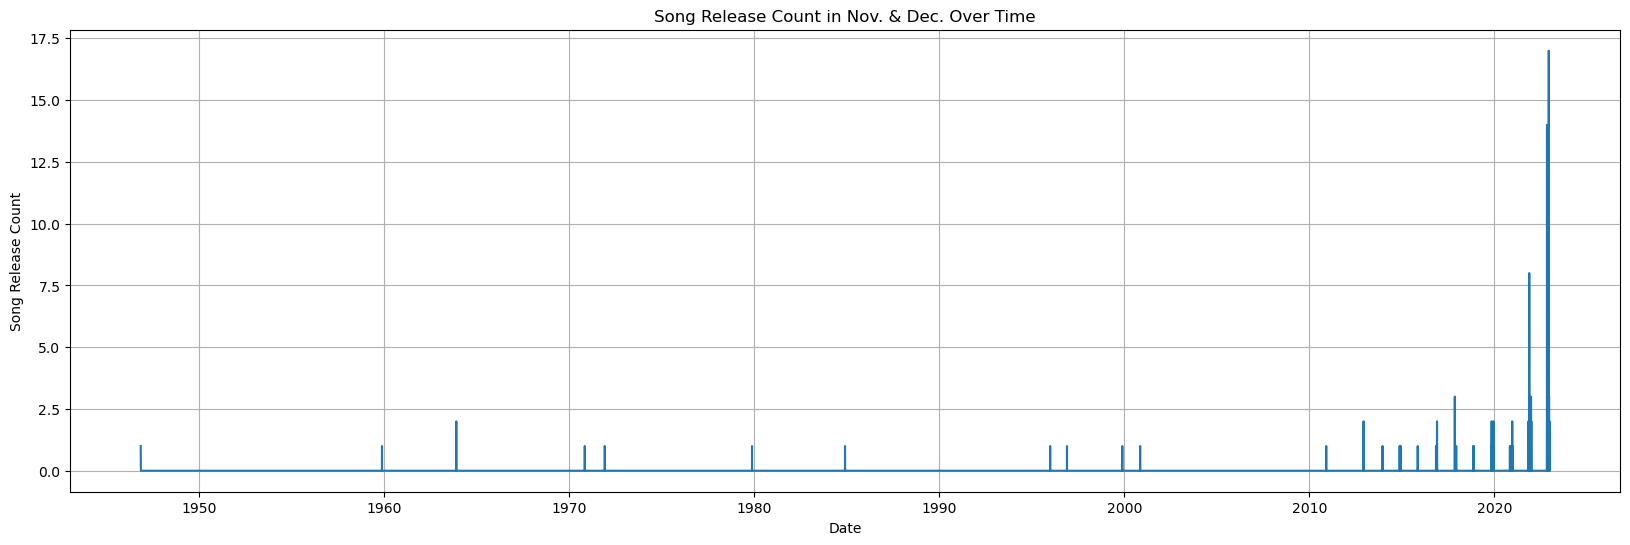

In [12]:
ds1=ds.copy()
ds1.set_index('release_date', inplace=True)

song_release_count= ds1.resample('D').size()

plt.figure(figsize=(20, 6))
plt.plot(song_release_count)
plt.title('Song Release Count in Nov. & Dec. Over Time')
plt.xlabel('Date')
plt.ylabel('Song Release Count')
plt.grid(True)
plt.show()


In [13]:
ds['release_date'].dt.year.value_counts()

release_date
2022    74
2021    32
2019     8
2016     6
2020     6
2017     5
2014     3
2018     2
2012     2
1963     2
1984     1
1996     1
1999     1
1995     1
2010     1
2000     1
1970     1
1979     1
1946     1
1971     1
1959     1
2013     1
2015     1
Name: count, dtype: int64

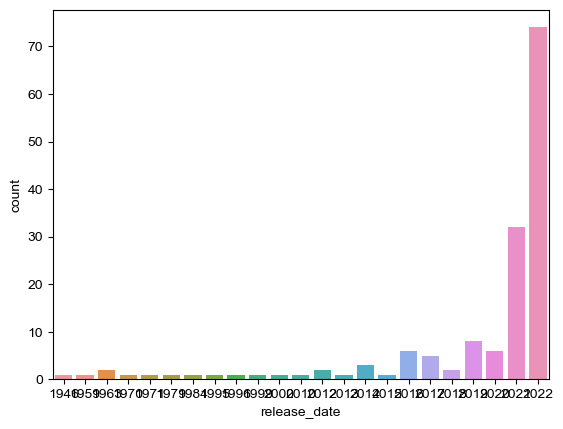

In [14]:
sns.countplot (data=ds, x=ds['release_date'].dt.year)
sns.set(rc={"figure.figsize":(5,10)}) #width=5, #height=10
plt.show()

This histogram shows the amount of songs [within the period of November to december] released per year from 1946 to 2022

<Axes: >

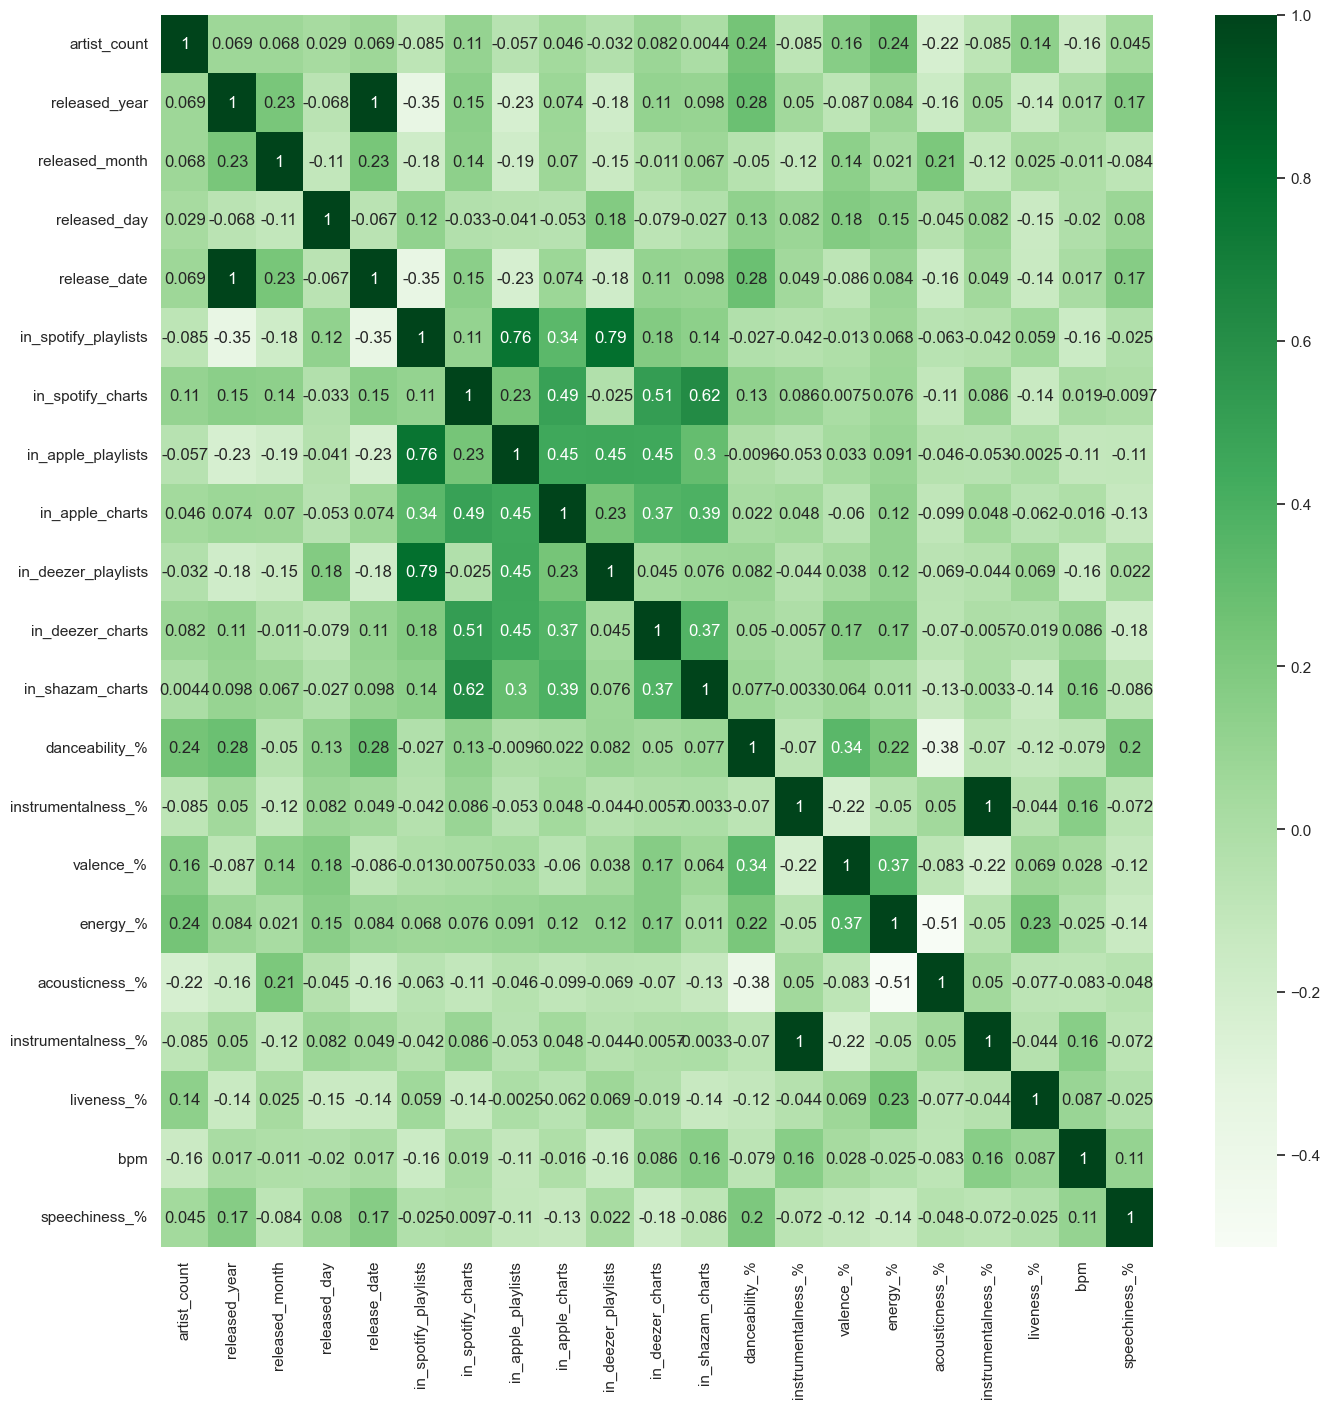

In [71]:
# setting up figure size
sns.set(rc={'figure.figsize':(16,16)})

# creating a correlation matrix for all the variables within the dataset
heat_map3=ds[['artist_count', 'released_year', 'released_month',
       'released_day', 'release_date','in_spotify_playlists', 'in_spotify_charts','in_apple_playlists',
              'in_apple_charts', 'in_deezer_playlists','in_deezer_charts','in_shazam_charts', 'danceability_%', 
              'instrumentalness_%','valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',  
              'bpm', 'speechiness_%']].corr()
cols=['artist_count', 'released_year', 'released_month',
       'released_day', 'release_date','in_spotify_playlists', 'in_spotify_charts','in_apple_playlists',
              'in_apple_charts', 'in_deezer_playlists','in_deezer_charts','in_shazam_charts', 'danceability_%', 
              'instrumentalness_%','valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',  
              'bpm', 'speechiness_%']
sns.heatmap(heat_map3,  xticklabels=cols, yticklabels=cols, annot=True, cmap="Greens")

Both population in spotify and deezer seem to have a more similar likings for the same songs then the population of apple users, but all toghether seem to like the same songs.
Ergo there is a higher correlation of deezer and spotify users that listen to the same songs than the apple users.

# EDA

In [19]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 15 to 950
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            153 non-null    object        
 1   artist(s)_name        153 non-null    object        
 2   artist_count          153 non-null    int64         
 3   released_year         153 non-null    int64         
 4   released_month        153 non-null    int64         
 5   released_day          153 non-null    int64         
 6   in_spotify_playlists  153 non-null    int64         
 7   in_spotify_charts     153 non-null    int64         
 8   streams               153 non-null    object        
 9   in_apple_playlists    153 non-null    int64         
 10  in_apple_charts       153 non-null    int64         
 11  in_deezer_playlists   153 non-null    int64         
 12  in_deezer_charts      153 non-null    int64         
 13  in_shazam_charts      14

In [20]:
ds.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153
mean,1.640523,2017.111111,11.490196,12.431373,4273.098039,9.869281,63.771242,49.000000,240.712418,2.222222,28.883562,121.699346,65.000000,50.470588,61.823529,30.562092,1.372549,18.640523,10.941176,2018-01-06 13:29:24.705882368
min,1.000000,1946.000000,11.000000,1.000000,86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,31.000000,4.000000,15.000000,0.000000,0.000000,3.000000,3.000000,1946-11-01 00:00:00
25%,1.000000,2019.000000,11.000000,4.000000,953.000000,0.000000,12.000000,10.000000,10.000000,0.000000,0.000000,99.000000,56.000000,35.000000,52.000000,6.000000,0.000000,10.000000,4.000000,2019-12-06 00:00:00
50%,1.000000,2021.000000,11.000000,9.000000,1800.000000,1.000000,29.000000,38.000000,34.000000,0.000000,2.000000,120.000000,66.000000,49.000000,63.000000,19.000000,0.000000,13.000000,6.000000,2021-12-24 00:00:00
75%,2.000000,2022.000000,12.000000,19.000000,4673.000000,16.000000,81.000000,78.000000,154.000000,1.000000,21.000000,142.000000,75.000000,69.000000,76.000000,47.000000,0.000000,26.000000,13.000000,2022-12-02 00:00:00
max,7.000000,2022.000000,12.000000,30.000000,43899.000000,88.000000,672.000000,199.000000,6280.000000,37.000000,529.000000,206.000000,96.000000,97.000000,95.000000,95.000000,90.000000,92.000000,59.000000,2022-12-30 00:00:00
std,1.004034,12.884382,0.501546,8.792764,6232.519108,16.727181,92.524854,43.505747,726.954748,5.280578,70.520284,27.110419,13.988717,22.411833,17.261197,28.232780,8.140932,14.108888,10.749685,NaN


## Artists with most streams on spotify

In [21]:
# dispalying the artists with the top 10 songs with most streams
top_10_streams = ds.loc[:,['artist(s)_name','streams']].sort_values(by='streams').tail(10)
top_10_streams

,artist(s)_name,streams
464,SZA,88092256
946,Selena Gomez,91473363
671,"Eminem, Dido",918915401
943,Drake,93367537
364,"MC Xenon, Os Gemeos da Putaria",93587665
458,"SZA, Don Toliver",94005786
603,"Sean Paul, Dua Lipa",956865266
950,Burna Boy,96007391
322,The Walters,972164968
455,SZA,98709329


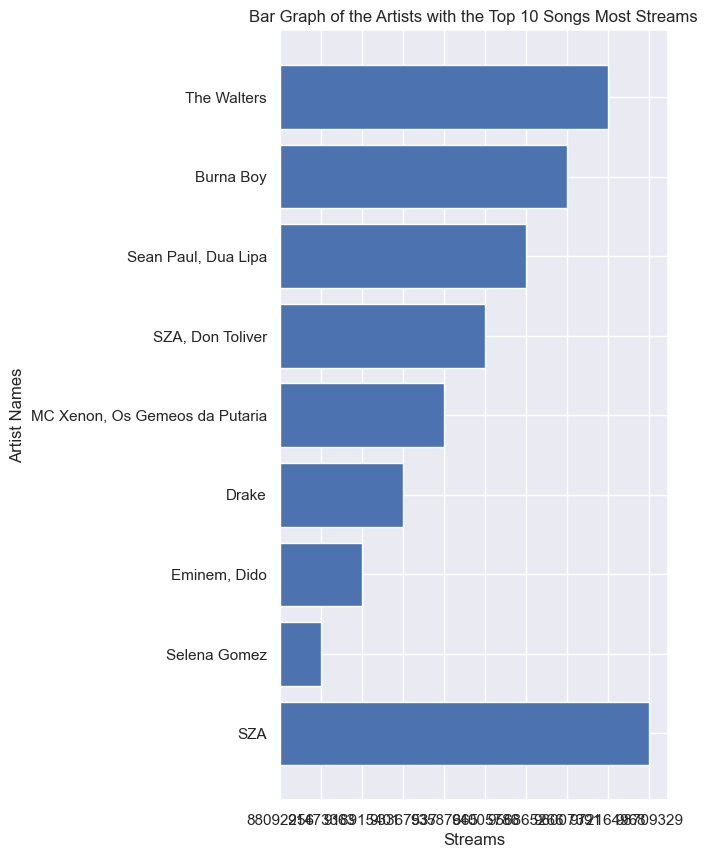

In [22]:
# creating bar plot of the artist name and the streams
plt.barh(top_10_streams['artist(s)_name'], top_10_streams['streams'])
# adding labels to graph
plt.xlabel('Streams')
plt.ylabel('Artist Names')
plt.title('Bar Graph of the Artists with the Top 10 Songs Most Streams')
plt.show()

Based on this bar graph, in 2023, The artist with the most streams on spotify was the SZA with the artist with the second most streams being Ed Sheeran and the artists with the third most streams being Lewis Capaldi.

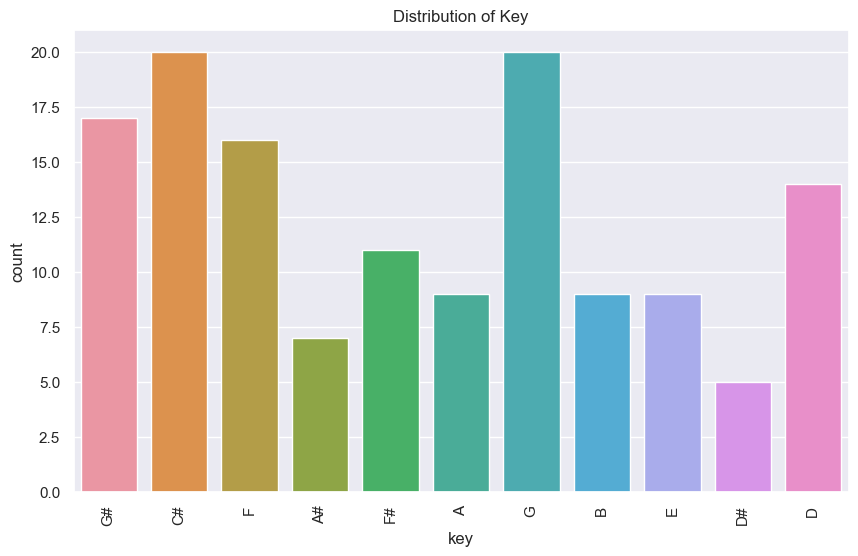

In [23]:
# Visualizing the distribution of the different crime types
plt.figure(figsize=(10, 6))
sns.countplot(x='key', data=ds)
plt.xticks(rotation=90)
plt.title('Distribution of Key')
plt.show()

## Logistic Regression on key category


### Identify the which key most of christmas songs appear in the data

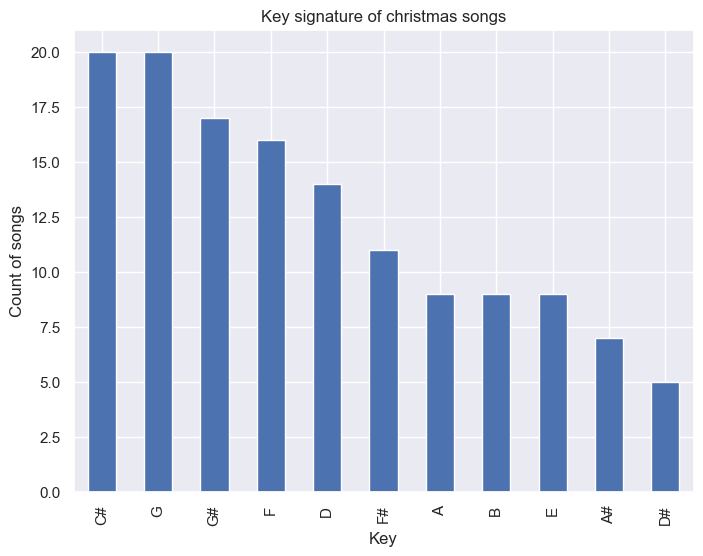

In [24]:
#Handling the categorical x variable
from sklearn.preprocessing import LabelEncoder
ds['key'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(8,6),title="Key signature of christmas songs")
plt.xlabel("Key")
plt.ylabel("Count of songs")
plt.show()

### Identify which mode is most used in christmas songs.

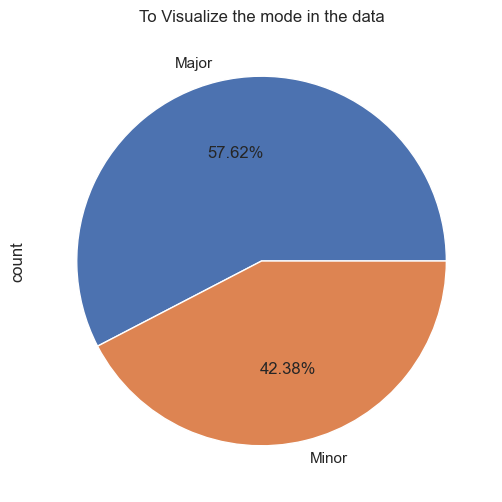

In [25]:
data['mode'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',figsize=(8,6),title="To Visualize the mode in the data",
    labels=['Major', 'Minor'],
    autopct='%1.2f%%')
plt.show()

### Observations:
#### bar chart
- The key C# is the most used key in christmas songs.
- The key D# is the least used in christmas songs.

#### Pie Chart
- In the pie chart we observe most of the songs are in a major mode.

### Create histogram to understanding Salary with Expreience wise


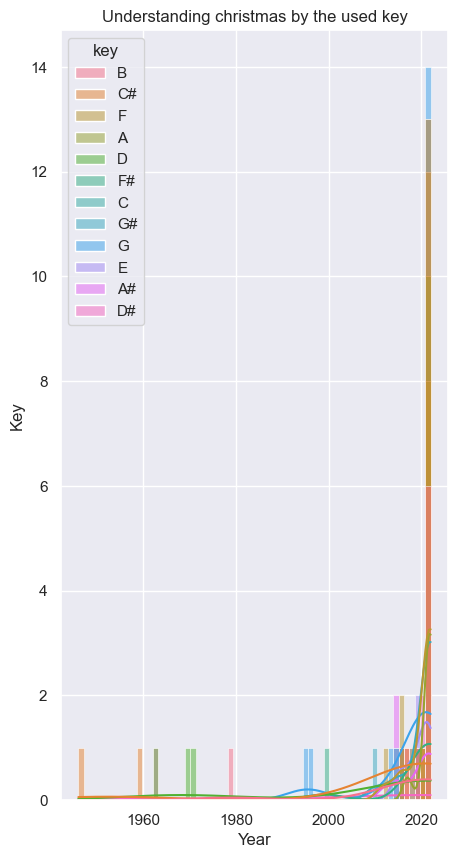

In [26]:
# Kernel density estimate (kde)
sns.histplot(data=data,x=ds['release_date'].dt.year,hue='key',kde=True)
plt.title("Understanding christmas by the used key")
plt.xlabel("Year")
plt.ylabel("Key")
plt.show()

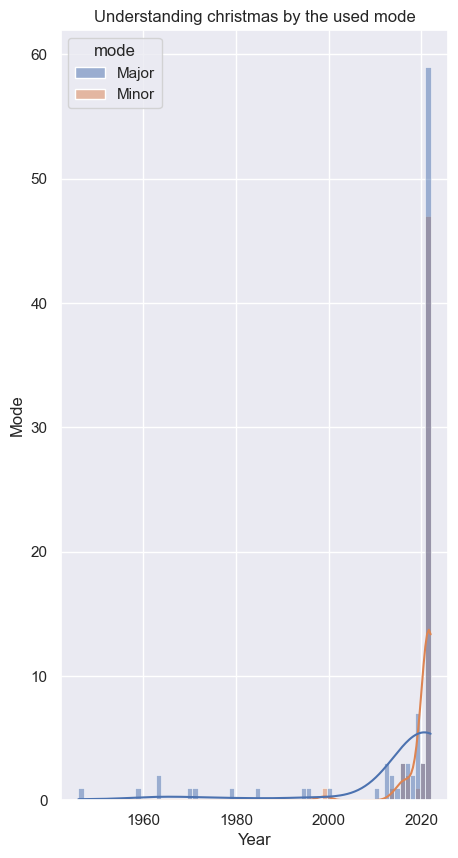

In [27]:
# Kernel density estimate (kde)
sns.histplot(data=data,x=ds['release_date'].dt.year,hue='mode',kde=True)
plt.title("Understanding christmas by the used mode")
plt.xlabel("Year")
plt.ylabel("Mode")
plt.show()

### Observations:
- From the Two histogram we observed some intresting things about the diversity of keys and mode of the songs.
- In the First chart most of the executive employee recived 100k to 600K
- For the key, it can be seen that there is mode diversity of keys used in the newly released christmas music. 
- In the Second chart we visualize that there is a more use of both modes, even after having clear trends of modes over the years.
- As predicted G#, C# and G are the most used key signatures.

### Visualize the bar chart the average salary for the data scientist with experience level and job title


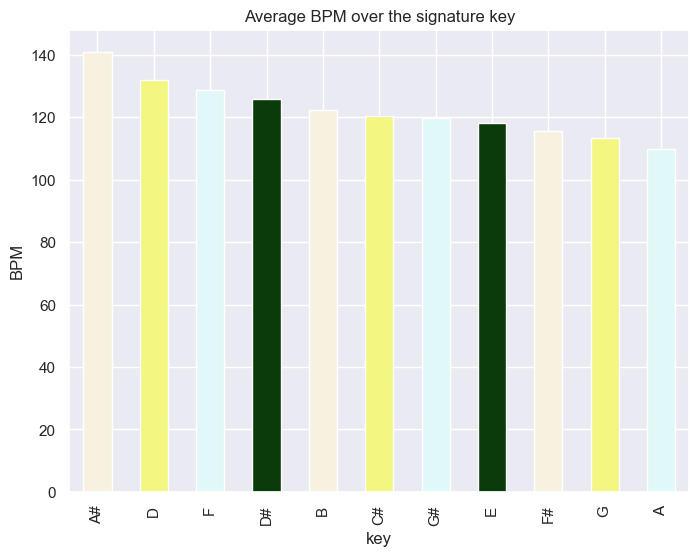

In [28]:
ds.groupby(['key'])['bpm'].mean().sort_values(ascending=False)\
.plot(kind='bar',title="Average BPM over the signature key",figsize=(8,6),color=['#F7F2E0','#F3F781','#E0F8F7','#0B3B0B'])
plt.xlabel("key")
plt.ylabel("BPM")
plt.show()

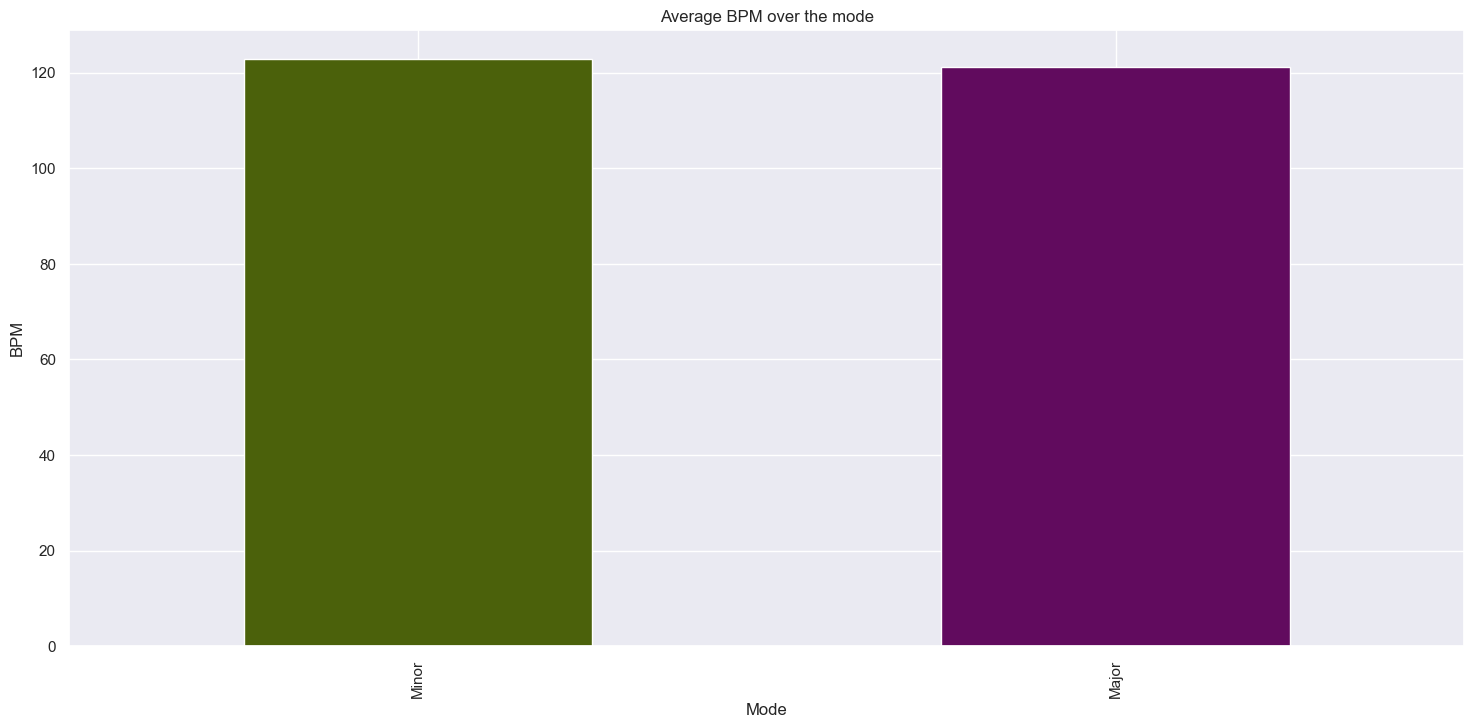

In [29]:
ds.groupby(['mode'])['bpm'].mean().sort_values(ascending=False)\
.plot(kind='bar',figsize=(18,8),title="Average BPM over the mode",color=['#4B610B','#610B5E','#E3CEF6','#F5F6CE','#D0A9F5','#F6E3CE'])
plt.xlabel("Mode")
plt.ylabel("BPM")
plt.xticks(rotation=90)
plt.show()

### Observations:
- From the first chart we can see that certain songs have a higher speed regardless of how popular those key might be.
- In the Second chart we can see that both major and minor modes have very similar bpm. 

## Linear Regression

### A. Linear Regression - Create a model to predict the cholestrol level of a person

In [30]:
ds.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'release_date'],
      dtype='object')

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Create independent and dependent variables to predict 

In [58]:
x=ds[['released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts',
      'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

In [59]:
y=ds[['bpm']]

### Splitting the dataset into the Training set and Test set

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=0)

## Training the Linear Regression model

In [61]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
#.fit to train your model
regressor.fit(x_train.values,y_train)

LinearRegression()

## Model performance check- R Square and RMSE score

In [62]:
y_pred=regressor.predict(x_test.values)


In [63]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 15 to 950
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            132 non-null    object        
 1   artist(s)_name        132 non-null    object        
 2   artist_count          132 non-null    int64         
 3   released_year         132 non-null    int64         
 4   released_month        132 non-null    int64         
 5   released_day          132 non-null    int64         
 6   in_spotify_playlists  132 non-null    int64         
 7   in_spotify_charts     132 non-null    int64         
 8   streams               132 non-null    object        
 9   in_apple_playlists    132 non-null    int64         
 10  in_apple_charts       132 non-null    int64         
 11  in_deezer_playlists   132 non-null    int64         
 12  in_deezer_charts      132 non-null    int64         
 13  in_shazam_charts      13

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
import math

print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R-square: {r2_score(y_test, y_pred):.2f}")

MSE: 812.27
RMSE: 28.50
R-square: -0.24


## Predicting new results

In [65]:
x_test.head()

,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
575,2021,11,19,1150,0,20,38,12,0,0.0,59,56,63,12,0,6,36
463,2022,12,9,1634,0,16,20,4,0,0.0,62,59,43,84,3,11,5
251,2022,12,16,1267,20,41,22,56,4,84.0,84,96,79,43,0,18,11
101,2022,12,2,2110,58,17,119,19,2,266.0,68,17,71,15,0,11,5
284,2021,11,25,1561,24,18,78,24,0,30.0,59,15,64,43,90,12,10


In [67]:
regressor.predict([[2014,1,24,434,13,0,0,1,0,0,0,1,1,0,0,0,0]])

array([[95.94354617]])

In [66]:
regressor.predict([[2021,2,9,1290,5,45,23,4,56,54,0,1,1,68,23,46,35]])

array([[198.50504779]])

In [68]:
regressor.predict([[1969,7,4,6,45,344,34,13,45,78,83,23,45,56,55,12,59]])

array([[156.95143204]])